In [ ]:
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
import sklearn 
from nltk.tokenize import word_tokenize
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
df=pd.read_excel('df_47k.xlsx')  
df

,Unnamed: 0,Unnamed: 0.1,text,Username,Timestamp,followers,label,categorie
0,0,0,بشرى سارة لجماهير النادي الأهلي \nللتفاصيل htt...,Al3hdNews,Sat Oct 10 19:41:00 +0000 2020,4,0,sport
1,1,1,@SXANJI لا احب الأنميات الرياضية يكفي اني اتاب...,fekrytarro22,Thu Oct 08 20:10:28 +0000 2020,365,0,sport
2,2,2,RT @kdzh37: الفتى الذهبي ⭐️ يعلن الاكتفاء ويضع...,hmde441,Fri Oct 09 20:55:46 +0000 2020,1663,0,sport
3,3,3,RT @KSA24: يسألون \nليه #مقاطعة_البضائع_التركي...,saefAlJohaniksa,Tue Oct 13 01:38:17 +0000 2020,443,4,economy
4,4,4,RT @Ahmed08911311: يوميا صفحه من القرآن \nكفيل...,wabil_,Sat Oct 10 21:27:14 +0000 2020,5873,2,religion
...,...,...,...,...,...,...,...,...
47078,47078,1995,RT @OKAZ_online: 🎥#فيديو | افتتاح المهرجان الس...,magdalmagdd,Mon Jan 10 17:35:03 +0000 2022,16,3,art
47079,47079,1996,RT @SaudiProject: مشروع #ميدان_الثقافة، مشروع ...,alrashed10006,Mon Jan 10 17:35:04 +0000 2022,136,3,art
47080,47080,1997,زرعت في ظل ودادي غصن الأمل ..,Leem_Lama91,Mon Jan 10 17:35:04 +0000 2022,81,3,art
47081,47081,1998,"RT @AntounAh: "" و لكني وجدت القوم لا يستهويهم ...",malika33_33,Mon Jan 10 17:35:11 +0000 2022,624,3,art


In [ ]:
df.drop(["Unnamed: 0.1","Unnamed: 0"], axis=1, inplace=True)


In [ ]:
df

,text,Username,Timestamp,followers,label,categorie
0,بشرى سارة لجماهير النادي الأهلي \nللتفاصيل htt...,Al3hdNews,Sat Oct 10 19:41:00 +0000 2020,4,0,sport
1,@SXANJI لا احب الأنميات الرياضية يكفي اني اتاب...,fekrytarro22,Thu Oct 08 20:10:28 +0000 2020,365,0,sport
2,RT @kdzh37: الفتى الذهبي ⭐️ يعلن الاكتفاء ويضع...,hmde441,Fri Oct 09 20:55:46 +0000 2020,1663,0,sport
3,RT @KSA24: يسألون \nليه #مقاطعة_البضائع_التركي...,saefAlJohaniksa,Tue Oct 13 01:38:17 +0000 2020,443,4,economy
4,RT @Ahmed08911311: يوميا صفحه من القرآن \nكفيل...,wabil_,Sat Oct 10 21:27:14 +0000 2020,5873,2,religion
...,...,...,...,...,...,...
47078,RT @OKAZ_online: 🎥#فيديو | افتتاح المهرجان الس...,magdalmagdd,Mon Jan 10 17:35:03 +0000 2022,16,3,art
47079,RT @SaudiProject: مشروع #ميدان_الثقافة، مشروع ...,alrashed10006,Mon Jan 10 17:35:04 +0000 2022,136,3,art
47080,زرعت في ظل ودادي غصن الأمل ..,Leem_Lama91,Mon Jan 10 17:35:04 +0000 2022,81,3,art
47081,"RT @AntounAh: "" و لكني وجدت القوم لا يستهويهم ...",malika33_33,Mon Jan 10 17:35:11 +0000 2022,624,3,art


In [ ]:
df=df.take(np.random.permutation(len(df))[:])

In [ ]:
df=df.reset_index(drop=True)

In [ ]:
df.to_excel('df_47k_after_shuffling.xlsx')  
df

,text,Username,Timestamp,followers,label,categorie
0,RT @_hobaz: مؤشرات الانتصار في الفترة دي أقوى ...,Rabea_kanan_FLP,Sun Jan 09 12:38:10 +0000 2022,275,1,politic
1,قاد احب الرسم,Lamrocknroll,Thu Oct 08 18:23:33 +0000 2020,85,3,art
2,RT @hsasmg1: التقيكم الخامسة والنصف مساءً على ...,4iiiiiii0,Mon Oct 12 17:36:29 +0000 2020,126,0,sport
3,افلاس سياسي والبكي عل اطلال لا ينفع سعد,appoo67,Thu Oct 08 19:50:01 +0000 2020,49,1,politic
4,RT @ahmedmosawy1: #الصرخي_يغرد_ولايةالفقيه_ولا...,0Z7dBVvjgXsQJaY,Thu Oct 08 19:56:06 +0000 2020,365,2,religion
...,...,...,...,...,...,...
47078,RT @AcademyZAD: شاهد الأن نهي الشريعة عن تكفير...,adnan14798344,Sat Oct 10 21:29:02 +0000 2020,176,2,religion
47079,@Mariam30_ المهم بس ان محدش ياخد رايه ده انه ر...,Ghada_Salah55,Fri Oct 09 22:37:11 +0000 2020,2578,2,religion
47080,RT @5a1di: اكبر ٨ شركات تركية ارسلت اليوم خطاب...,naziek26,Sat Oct 10 17:04:19 +0000 2020,764,4,economy
47081,@saturngirl____ اوكيه بس ماراح توقف فقرة الغنا...,__Brunette0,Mon Oct 12 21:53:35 +0000 2020,660,3,art


In [ ]:
df.shape

(47083, 6)

In [ ]:
df.isna().sum()

text         0
Username     0
Timestamp    0
followers    0
label        0
categorie    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47083 entries, 0 to 47082
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       47083 non-null  object
 1   Username   47083 non-null  object
 2   Timestamp  47083 non-null  object
 3   followers  47083 non-null  int64 
 4   label      47083 non-null  int64 
 5   categorie  47083 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.2+ MB


In [ ]:

COMMA = u'\u060C'
SEMICOLON = u'\u061B'
QUESTION = u'\u061F'
HAMZA = u'\u0621'
ALEF_MADDA = u'\u0622'
ALEF_HAMZA_ABOVE = u'\u0623'
WAW_HAMZA = u'\u0624'
ALEF_HAMZA_BELOW = u'\u0625'
YEH_HAMZA = u'\u0626'
ALEF = u'\u0627'
BEH = u'\u0628'
TEH_MARBUTA = u'\u0629'
TEH = u'\u062a'
THEH = u'\u062b'
JEEM = u'\u062c'
HAH = u'\u062d'
KHAH = u'\u062e'
DAL = u'\u062f'
THAL = u'\u0630'
REH = u'\u0631'
ZAIN = u'\u0632'
SEEN = u'\u0633'
SHEEN = u'\u0634'
SAD = u'\u0635'
DAD = u'\u0636'
TAH = u'\u0637'
ZAH = u'\u0638'
AIN = u'\u0639'
GHAIN = u'\u063a'
TATWEEL = u'\u0640'
FEH = u'\u0641'
QAF = u'\u0642'
KAF = u'\u0643'
LAM = u'\u0644'
MEEM = u'\u0645'
NOON = u'\u0646'
HEH = u'\u0647'
WAW = u'\u0648'
ALEF_MAKSURA = u'\u0649'
YEH = u'\u064a'
MADDA_ABOVE = u'\u0653'
HAMZA_ABOVE = u'\u0654'
HAMZA_BELOW = u'\u0655'
ZERO = u'\u0660'
ONE = u'\u0661'
TWO = u'\u0662'
THREE = u'\u0663'
FOUR = u'\u0664'
FIVE = u'\u0665'
SIX = u'\u0666'
SEVEN = u'\u0667'
EIGHT = u'\u0668'
NINE = u'\u0669'
PERCENT = u'\u066a'
DECIMAL = u'\u066b'
THOUSANDS = u'\u066c'
STAR = u'\u066d'
MINI_ALEF = u'\u0670'
ALEF_WASLA = u'\u0671'
FULL_STOP = u'\u06d4'
BYTE_ORDER_MARK = u'\ufeff'

# Diacritics
FATHATAN = u'\u064b'
DAMMATAN = u'\u064c'
KASRATAN = u'\u064d'
FATHA = u'\u064e'
DAMMA = u'\u064f'
KASRA = u'\u0650'
SHADDA = u'\u0651'
SUKUN = u'\u0652'

#Ligatures
LAM_ALEF = u'\ufefb'
LAM_ALEF_HAMZA_ABOVE = u'\ufef7'
LAM_ALEF_HAMZA_BELOW = u'\ufef9'
LAM_ALEF_MADDA_ABOVE = u'\ufef5'
SIMPLE_LAM_ALEF = u'\u0644\u0627'
SIMPLE_LAM_ALEF_HAMZA_ABOVE = u'\u0644\u0623'
SIMPLE_LAM_ALEF_HAMZA_BELOW = u'\u0644\u0625'
SIMPLE_LAM_ALEF_MADDA_ABOVE = u'\u0644\u0622'


HARAKAT_PAT = re.compile(u"["+u"".join([FATHATAN, DAMMATAN, KASRATAN,
                                        FATHA, DAMMA, KASRA, SUKUN,
                                        SHADDA])+u"]")
HAMZAT_PAT = re.compile(u"["+u"".join([WAW_HAMZA, YEH_HAMZA])+u"]")
ALEFAT_PAT = re.compile(u"["+u"".join([ALEF_MADDA, ALEF_HAMZA_ABOVE,
                                       ALEF_HAMZA_BELOW, HAMZA_ABOVE,
                                       HAMZA_BELOW])+u"]")
LAMALEFAT_PAT = re.compile(u"["+u"".join([LAM_ALEF,
                                          LAM_ALEF_HAMZA_ABOVE,
                                          LAM_ALEF_HAMZA_BELOW,
LAM_ALEF_MADDA_ABOVE])+u"]")


""" https://github.com/cltk/cltk/blob/master/cltk/corpus/arabic/alphabet.py """
WESTERN_ARABIC_NUMERALS = ['0','1','2','3','4','5','6','7','8','9']

#EASTERN_ARABIC_NUMERALS = [u'\u06F0', u'\u06F1', u'\u06F2', u'\u06F3', u'\u0664', u'\u06F5', u'\u0666', u'\u06F7', u'\u06F8', u'\u06F9']
EASTERN_ARABIC_NUMERALS = [u'۰', u'۱', u'۲', u'۳', u'٤', u'۵', u'٦', u'۷', u'۸', u'۹']

eastern_to_western_numerals = {}
for i in range(len(EASTERN_ARABIC_NUMERALS)):
    eastern_to_western_numerals[EASTERN_ARABIC_NUMERALS[i]] = WESTERN_ARABIC_NUMERALS[i]

# Punctuation marks
COMMA = u'\u060C'
SEMICOLON = u'\u061B'
QUESTION = u'\u061F'

# Other symbols
PERCENT = u'\u066a'
DECIMAL = u'\u066b'
THOUSANDS = u'\u066c'
STAR = u'\u066d'
FULL_STOP = u'\u06d4'
MULITIPLICATION_SIGN = u'\u00D7'
DIVISION_SIGN = u'\u00F7'

arabic_punctuations = COMMA + SEMICOLON + QUESTION + PERCENT + DECIMAL + THOUSANDS + STAR + FULL_STOP + MULITIPLICATION_SIGN + DIVISION_SIGN
all_punctuations = string.punctuation + arabic_punctuations + '()[]{}'

all_punctuations = ''.join(list(set(all_punctuations)))


In [ ]:
def strip_tashkeel(text):
    text = HARAKAT_PAT.sub('', text)
    text = re.sub(u"[\u064E]", "", text,  flags=re.UNICODE) # fattha
    text = re.sub(u"[\u0671]", "", text,  flags=re.UNICODE) # waSla
    return text 

def strip_tatweel(text):
    return re.sub(u'[%s]' % TATWEEL, '', text)


def remove_non_arabic(text):
    return ' '.join(re.sub(u"[^\u0621-\u063A\u0640-\u0652 ]", " ", text,  flags=re.UNICODE).split())


def keep_arabic_english_n_symbols(text):
    return ' '.join(re.sub(u"[^\u0621-\u063A\u0640-\u064aa-zA-Z#@_:/ ]", "", text,  flags=re.UNICODE).split())


def normalize_hamza(text):
    text = ALEFAT_PAT.sub(ALEF, text)
    return HAMZAT_PAT.sub(HAMZA, text)


def normalize_spellerrors(text):
    text = re.sub(u'[%s]' % TEH_MARBUTA, HEH, text)
    return re.sub(u'[%s]' % ALEF_MAKSURA, YEH, text)


def normalize_lamalef(text):
    return LAMALEFAT_PAT.sub(u'%s%s'%(LAM, ALEF), text)


def normalize_arabic_text(text):
    text = remove_non_arabic(text)
    text = strip_tashkeel(text)
    text = strip_tatweel(text)
    text = normalize_lamalef(text)
    text = normalize_hamza(text)
    text = normalize_spellerrors(text)
    return text


def remove_underscore(text):
    return ' '.join(text.split('_'))


def remove_retweet_tag(text):
    return re.compile('\#').sub('', re.compile('rt @[a-zA-Z0-9_]+:|@[a-zA-Z0-9_]+').sub('', text).strip())


def replace_emails(text):
    emails = re.findall(r'[\w\.-]+@[\w\.-]+', text)
    for email in emails:
        text = text.replace(email,'#')
        #text = text.replace(email,' hasEmailAddress ')
    return text

def replace_urls(text):
    return re.sub(r"http\S+|www.\S+", "#", text)
    #return re.sub(r"http\S+|www.\S+", " hasURL ", text)

def convert_eastern_to_western_numerals(text):
    for num in EASTERN_ARABIC_NUMERALS:
        text = text.replace(num, eastern_to_western_numerals[num])
    return text

def remove_all_punctuations(text):
    for punctuation in all_punctuations:
        text = text.replace(punctuation, ' ')
    return text

def remove_emojis(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def replace_phone_numbers(text):
    return re.sub(r'\d{10}', '#', text)
    # return re.sub(r'\d{10}', ' hasPhoneNumber ', text)

def remove_extra_spaces(text):
    return ' '.join(text.split())

def normalize_tweet(text):
    new_text = text.lower()
    #new_text = normalize_hamza(new_text)
    new_text = strip_tashkeel(new_text)
    new_text = strip_tatweel(new_text)
    new_text = normalize_lamalef(new_text)
    #new_text = normalize_spellerrors(new_text)
    new_text = remove_retweet_tag(new_text)
    new_text = replace_emails(new_text)
    new_text = remove_underscore(new_text)
    new_text = replace_phone_numbers(new_text)
    new_text = remove_all_punctuations(new_text)
    new_text = replace_urls(new_text)
    new_text = convert_eastern_to_western_numerals(new_text)
#    new_text = keep_arabic_english_n_symbols(new_text)
    new_text = remove_non_arabic(new_text)
    new_text = remove_extra_spaces(new_text)
    
    return new_text


In [ ]:
df['text'] = df['text'].apply(normalize_tweet)
df

,text,Username,Timestamp,followers,label,categorie
0,مؤشرات الانتصار في الفترة دي أقوى مقارنة بفترة...,Rabea_kanan_FLP,Sun Jan 09 12:38:10 +0000 2022,275,1,politic
1,قاد احب الرسم,Lamrocknroll,Thu Oct 08 18:23:33 +0000 2020,85,3,art
2,التقيكم الخامسة والنصف مساء على إذاعة عبر برنا...,4iiiiiii0,Mon Oct 12 17:36:29 +0000 2020,126,0,sport
3,افلاس سياسي والبكي عل اطلال لا ينفع سعد,appoo67,Thu Oct 08 19:50:01 +0000 2020,49,1,politic
4,الصرخي يغرد ولايةالفقيه ولايةالطاغوت سقيفه الع...,0Z7dBVvjgXsQJaY,Thu Oct 08 19:56:06 +0000 2020,365,2,religion
...,...,...,...,...,...,...
47078,شاهد الأن نهي الشريعة عن تكفير المسلم من محاضر...,adnan14798344,Sat Oct 10 21:29:02 +0000 2020,176,2,religion
47079,المهم بس ان محدش ياخد رايه ده انه راي ديني وبج...,Ghada_Salah55,Fri Oct 09 22:37:11 +0000 2020,2578,2,religion
47080,اكبر شركات تركية ارسلت اليوم خطاب للسعودية تطا...,naziek26,Sat Oct 10 17:04:19 +0000 2020,764,4,economy
47081,اوكيه بس ماراح توقف فقرة الغناء ترا,__Brunette0,Mon Oct 12 21:53:35 +0000 2020,660,3,art


In [ ]:
# df.tail(20).groupby(['Timestamp'],acs)

# Visualisation Of Data
### - EDA

In [ ]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
df['categorie'].iplot(
    kind='hist',
    xTitle='categorie',
    linecolor='black',
    yTitle='count',
    title='number of tweets by category')

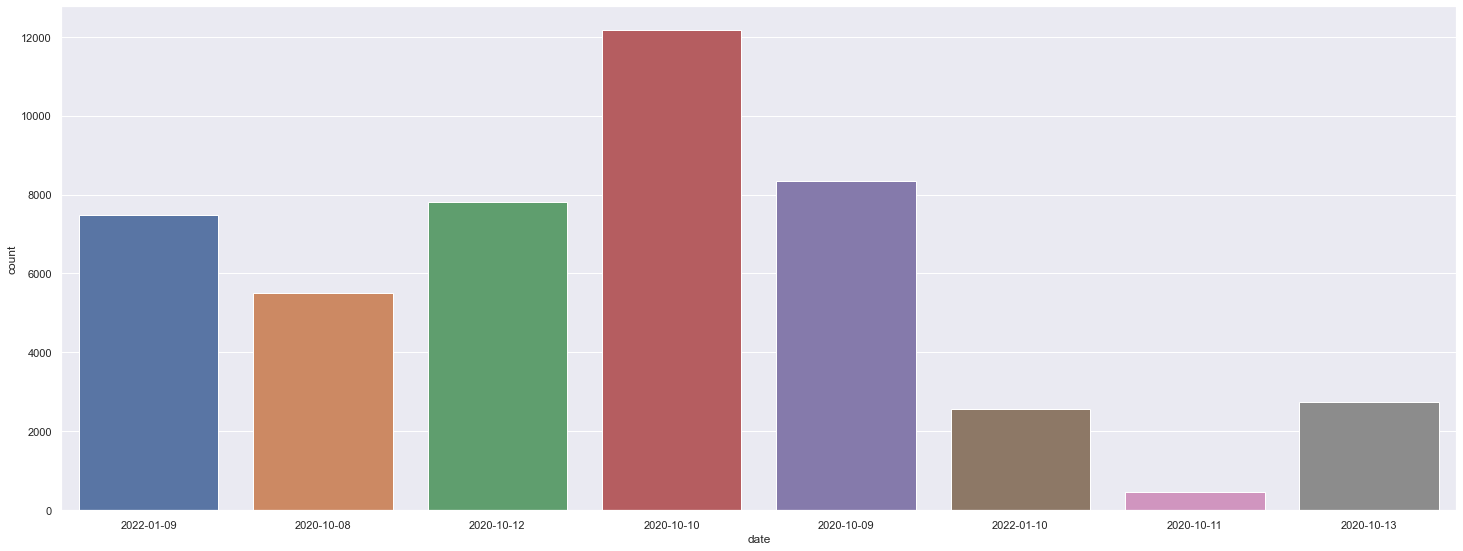

In [ ]:
df['date']=pd.to_datetime(df['Timestamp']).dt.date
import seaborn as sns
sns.countplot(x="date", data=df)
sns.set(rc={'figure.figsize':(25,9.27)})

In [ ]:
df['text'][5]

'مفاجأة الفيفا لم يفسخ عقد بلايلي مع الأهلي السعودي'

# Word Frequencies


In [ ]:
tweets = df.text.str.cat(sep=' ')
#tweets 

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
#function to split text into word
tokens = word_tokenize(tweets)

vocabulary = set(tokens)
print(len(vocabulary))

frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:20]

68712


['في',
 'من',
 'على',
 'و',
 'عن',
 'الله',
 'شراء',
 'لا',
 'ما',
 'الرياضة',
 'بالرياض',
 'الحكومة',
 'كل',
 'ان',
 'مع',
 'أن',
 'التجارة',
 'الدين',
 'الصلاة',
 'القدم']

# Unigrams by Counts

In [ ]:
def top_n_words(corpus, n=None):

    cv = CountVectorizer(stop_words= stopwords.words("arabic")).fit(corpus) 
    bag_of_words = cv.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = top_n_words(df['text'], 25)
for word, count in common_words:
    
    print(word, count)
df_unigrams = pd.DataFrame(common_words,columns = ['word' , 'count'])
df_unigrams.head(30)


الله 4184
شراء 4129
الرياضة 3368
بالرياض 3365
الحكومة 3018
ان 2725
التجارة 2435
الدين 2407
الصلاة 2358
القدم 2281
كرة 2249
وزارة 2152
القانون 2128
اثاث 1990
الأسعار 1838
القرآن 1788
ال 1759
الفن 1721
اليوم 1680
اللهم 1662
مستعمل 1648
اللي 1572
الاقتصاد 1509
علي 1371
محمد 1340


,word,count
0,الله,4184
1,شراء,4129
2,الرياضة,3368
3,بالرياض,3365
4,الحكومة,3018
5,ان,2725
6,التجارة,2435
7,الدين,2407
8,الصلاة,2358
9,القدم,2281


In [ ]:
import cufflinks as cf
#configure_plotly_browser_state()
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
df_unigrams.groupby('word').sum()['count'].sort_values(ascending=False).iplot(color = 'darkorange',theme='solar', mode='markers+lines',
    kind='bar', yTitle='Count', linecolor='white', title='top 20 unigrams in text')

# Bigrams By counts


In [ ]:
def top_n_words(corpus, n=None):
    cv = CountVectorizer(stop_words= stopwords.words("arabic"),ngram_range=(2, 2)).fit(corpus)
    bag_of_words = cv.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = top_n_words(df['text'], 20)
#for word, count in common_words:
    
    #print(word, count)
df_bigrams = pd.DataFrame(common_words, columns = ['word' , 'count'])
df_bigrams.head(10)

,word,count
0,كرة القدم,2176
1,اثاث مستعمل,1627
2,مستعمل بالرياض,1446
3,شراء اثاث,1436
4,وزارة الرياضة,1238
5,الاثاث المستعمل,974
6,نقل عفش,972
7,بالرياض شراء,906
8,ليلة المعازيم,669
9,شراء الاثاث,625


In [ ]:
import cufflinks as cf
#configure_plotly_browser_state()
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
df_bigrams.groupby('word').sum()['count'].sort_values(ascending=False).iplot(color = 'darkorange',theme='solar', mode='markers+lines',
    kind='bar', yTitle='Count', linecolor='white', title='top 100 bigrams in text')

# Trigrams By Counts


In [ ]:
def top_n_words(corpus, n=None):
    vect = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vect.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vect.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = top_n_words(df['text'],20)
#for word, count in common_words:
    
    #print(word, count)
df_trigram = pd.DataFrame(common_words, columns = ['word' , 'count'])
df_trigram.head(20)
#df_trigram.to_excel('df_trigram.xlsx')

,word,count
0,اثاث مستعمل بالرياض,1444
1,شراء اثاث مستعمل,1398
2,أعوذ بك من,566
3,اللهم إني أعوذ,565
4,إني أعوذ بك,565
5,بك من الهم,557
6,من الهم والحزن,554
7,الدين وقهر الرجال,554
8,والحزن والعجز والكسل,547
9,الهم والحزن والعجز,546


In [ ]:
df_trigram.groupby('word').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 bigrams in text')

# Stop Words

In [ ]:
stop = stopwords.words('arabic')
#words = set(nltk.corpus.words.words())
arab_stopwords = set(nltk.corpus.stopwords.words("arabic"))
arab_stopwords

{'ء',
 'ءَ',
 'آ',
 'آب',
 'آذار',
 'آض',
 'آمينَ',
 'آناء',
 'آنفا',
 'آه',
 'آها',
 'آهاً',
 'آهٍ',
 'آهِ',
 'آي',
 'أ',
 'أبدا',
 'أبريل',
 'أبو',
 'أبٌ',
 'أجل',
 'أجمع',
 'أحد',
 'أخبر',
 'أخذ',
 'أخو',
 'أخٌ',
 'أربع',
 'أربعاء',
 'أربعة',
 'أربعمئة',
 'أربعمائة',
 'أرى',
 'أسكن',
 'أصبح',
 'أصلا',
 'أضحى',
 'أطعم',
 'أعطى',
 'أعلم',
 'أغسطس',
 'أف',
 'أفريل',
 'أفعل به',
 'أفٍّ',
 'أقبل',
 'أقل',
 'أكتوبر',
 'أكثر',
 'أل',
 'ألا',
 'ألف',
 'ألفى',
 'أم',
 'أما',
 'أمام',
 'أمامك',
 'أمامكَ',
 'أمد',
 'أمس',
 'أمسى',
 'أمّا',
 'أن',
 'أنا',
 'أنبأ',
 'أنت',
 'أنتم',
 'أنتما',
 'أنتن',
 'أنتِ',
 'أنشأ',
 'أنى',
 'أنًّ',
 'أنّى',
 'أهلا',
 'أو',
 'أوت',
 'أوشك',
 'أول',
 'أولئك',
 'أولاء',
 'أولالك',
 'أوه',
 'أوّهْ',
 'أى',
 'أي',
 'أيا',
 'أيار',
 'أيضا',
 'أيلول',
 'أين',
 'أينما',
 'أيها',
 'أيّ',
 'أيّان',
 'أُفٍّ',
 'ؤ',
 'إحدى',
 'إذ',
 'إذا',
 'إذاً',
 'إذما',
 'إذن',
 'إزاء',
 'إلا',
 'إلى',
 'إليك',
 'إليكم',
 'إليكما',
 'إليكن',
 'إليكنّ',
 'إليكَ',
 'إلَيْكَ',
 'إلّا',


In [ ]:
arab_stopwords = r'\b(?:{})\b'.format('|'.join(arab_stopwords))
arab_stopwords

'\\b(?:نون|لهم|نعم|هَاتِي|جانفي|وإذا|ألف|عند|بعض|اللاتي|يفعلون|أسكن|خمسين|جمعة|على|إمّا|لك|طالما|بكن|قرش|أوّهْ|كسا|طاء|نوفمبر|مادام|إليك|سنتيم|فرادى|ما|أبو|أو|ص|حدَث|كلّما|ثم|هذه|مئة|هَاتِه|باء|صراحة|إحدى|ما أفعله|جير|أربعة|دون|جويلية|أخذ|مما|طفق|أمامك|فيه|عسى|فمن|خامس|مهما|كانون|تسع|أوشك|إلّا|لئن|مكانكنّ|ذاك|أولالك|تِه|بنا|كأن|ز|ذواتا|غ|ثمانين|وهب|شرع|هاك|إنه|دونك|بهن|تِي|أين|لعلَّ|تي|هي|كل|بكما|غين|بسّ|أ|ورد|بعدا|لنا|إذاً|رزق|حسب|أنًّ|لي|عشر|ؤ|أكتوبر|ثماني|عاشر|صبرا|ثمة|واهاً|لدن|وراءَك|س|ئ|سرعان|معاذ|اللذان|إى|أما|سبعمائة|اربعين|تاء|خاصة|سقى|هاتان|طاق|لام|شتان|آنفا|حيثما|وجد|إليكن|تانِ|مرّة|اللتين|أخٌ|مساء|أنتن|عدَّ|سحقا|إليكم|تموز|ك|ث|تانِك|ما انفك|كذا|هلا|آض|لمّا|هنا|حين|جيم|رجع|قاف|لوما|يوليو|أن|تجاه|سبتمبر|ب|عين|أمام|لكنما|تسعة|ستون|نحو|كان|أقل|ديسمبر|كأنما|ء|إليكنّ|ثمان|اتخذ|خال|فلا|لكما|أنا|آي|ثامن|جعل|بي|إذ|حَذارِ|أضحى|ولكن|ثان|لكن|هلّا|أحد|ي|ثمّة|كليكما|ض|صهْ|هَذِه|حمو|منها|إن|أجل|دينار|كيفما|تارة|هؤلاء|أمسى|هبّ|خمسة|يا|فيم|ة|آها|ميم|أنّى|ثالث|يناير|ذيت|إي|إذن|ريث|شيكل|كلَّا

In [ ]:
df['text']=df['text'].str.replace(arab_stopwords, '')
df['text'].tail(10)

47073                     حسم موقف رباعي  مدريد  الكلاسيكو
47074                          جمالك وجمال الرسم  شاء الله
47075           يعني صح التمثيل    الاخراج والقصص مره حلوه
47076                   كريستيانو ضد كبار القوم  كرة القدم
47077    لكل  جادت نفسه بفعل الخير ساهم بمد يد العون وك...
47078    شاهد الأن نهي الشريعة  تكفير المسلم  محاضرات ا...
47079    المهم  ان محدش ياخد رايه ده انه راي ديني وبجد ...
47080    اكبر شركات تركية ارسلت اليوم خطاب للسعودية تطا...
47081                    اوكيه  ماراح توقف فقرة الغناء ترا
47082    اكبر شركات تركية ارسلت اليوم خطاب للسعودية تطا...
Name: text, dtype: object

In [ ]:
df['categorie'].replace({'sport':'الرياضة','politic':'السياسة ','religion':'الديانة','art':'فن','economy':'الاقتصاد'}, inplace=True)
df

,text,Username,Timestamp,followers,label,categorie,date
0,مؤشرات الانتصار الفترة دي أقوى مقارنة بفترة غ...,Rabea_kanan_FLP,Sun Jan 09 12:38:10 +0000 2022,275,1,السياسة,2022-01-09
1,قاد احب الرسم,Lamrocknroll,Thu Oct 08 18:23:33 +0000 2020,85,3,فن,2020-10-08
2,التقيكم الخامسة والنصف إذاعة عبر برنامج الم...,4iiiiiii0,Mon Oct 12 17:36:29 +0000 2020,126,0,الرياضة,2020-10-12
3,افلاس سياسي والبكي اطلال ينفع سعد,appoo67,Thu Oct 08 19:50:01 +0000 2020,49,1,السياسة,2020-10-08
4,الصرخي يغرد ولايةالفقيه ولايةالطاغوت سقيفه الع...,0Z7dBVvjgXsQJaY,Thu Oct 08 19:56:06 +0000 2020,365,2,الديانة,2020-10-08
...,...,...,...,...,...,...,...
47078,شاهد الأن نهي الشريعة تكفير المسلم محاضرات ا...,adnan14798344,Sat Oct 10 21:29:02 +0000 2020,176,2,الديانة,2020-10-10
47079,المهم ان محدش ياخد رايه ده انه راي ديني وبجد ...,Ghada_Salah55,Fri Oct 09 22:37:11 +0000 2020,2578,2,الديانة,2020-10-09
47080,اكبر شركات تركية ارسلت اليوم خطاب للسعودية تطا...,naziek26,Sat Oct 10 17:04:19 +0000 2020,764,4,الاقتصاد,2020-10-10
47081,اوكيه ماراح توقف فقرة الغناء ترا,__Brunette0,Mon Oct 12 21:53:35 +0000 2020,660,3,فن,2020-10-12


# Tokenize Word and Sentence


In [ ]:
sentences = df.iloc[30]
sentences['text']
print (nltk.sent_tokenize(sentences['text']))
print('*********************************')
print (nltk.word_tokenize(sentences['text']))

[' بعهدك برائسة الحكومة عهدك  فشل ذريع']
*********************************
['بعهدك', 'برائسة', 'الحكومة', 'عهدك', 'فشل', 'ذريع']


# Stemmer

In [ ]:
#Tashaphyne is an Arabic light stemmer and segmentor. 
from tashaphyne.stemming import ArabicLightStemmer
ArListem = ArabicLightStemmer()

 # stemming word
stem = ArListem.light_stem(sentences['text'])
 # extract stem
print (ArListem.get_stem())
print('\n')
 # extract root
print (ArListem.get_root())
print('\n')
print (ArListem.get_prefix())
print('\n')
print (ArListem.get_suffix())

 بعهدك برائسة الحكومة عهدك  فشل ذريع


 بعهدك برءس لحكم عهدك  فشل ذرع








In [ ]:
from nltk.stem.isri import ISRIStemmer
st = ISRIStemmer()
for a in word_tokenize(sentences['text']):

    print(st.stem(a))

عهد
برس
حكم
عهد
فشل
ذرع


# Bag Of Word


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()
count_vector.fit(df['text'])

CountVectorizer()

In [ ]:
doc_array = count_vector.transform(df['text'][:5000]).toarray()
doc_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [ ]:
frequency_matrix = pd.DataFrame(doc_array,index=df['text'][:5000],columns=count_vector.get_feature_names())
frequency_matrix.head()

,ءامنوا,ءاناي,ءل,ءلك,آآآمين,آآآه,آاه,آبآئ,آباء,آباؤنا,...,ييزي,ييسر,ييسسس,ييسونغ,ييشرفها,ييشينغ,يييارب,يييه,ييييه,يييييا
text,,,,,,,,,,,,,,,,,,,,,
مؤشرات الانتصار الفترة دي أقوى مقارنة بفترة غرف التفاوض القوى السياسية القادمة ستكون الشارع نفسه يشكل مطالب واضحة,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
قاد احب الرسم,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
التقيكم الخامسة والنصف إذاعة عبر برنامج المذيع المتألق الزميل العزيز للحديث أب,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
افلاس سياسي والبكي اطلال ينفع سعد,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
الصرخي يغرد ولايةالفقيه ولايةالطاغوت سقيفه العجم تنصب الطاغوت الاستخفاف بدماء العراقيين تراق بأسم الد,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# TF IDF


In [ ]:
# converts the words to a matrix of TF-IDF features
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(df['text'][:5000]).toarray()
df_tf = pd.DataFrame(X, columns=tfidf_vectorizer.get_feature_names())
df_tf.head(5)

,آبدا,آثار,آخذ,آخر,آخسر,آداء,آداب,آدم,آذان,آرسين,...,يونس,يونغهوا,يونقي,يي,ييبلغنا,ييجوا,ييسر,ييشرفها,ييشينغ,يييارب
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Word Cloud


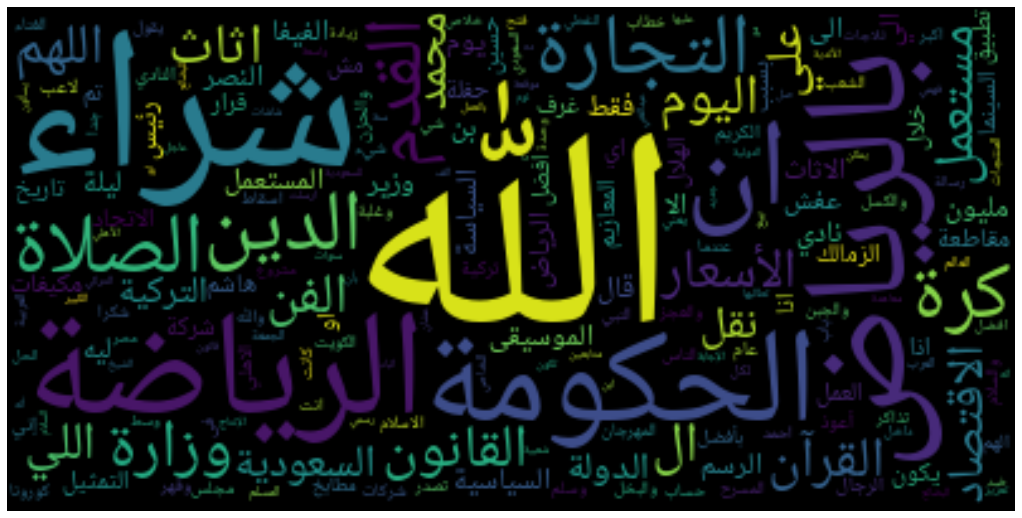

In [ ]:
text=df['text']

text = ' '.join([str(elem) for elem in text])
from collections import Counter

from wordcloud import WordCloud          # pip install wordcloud
import matplotlib.pyplot as plt          
# -- Arabic text dependencies
from arabic_reshaper import reshape      # pip install arabic-reshaper
from bidi.algorithm import get_display   # pip install python-bidi

rtl = lambda w: get_display(reshape(f'{w}'))

COUNTS = Counter(text.split())
counts = {rtl(k):v for k, v in COUNTS.most_common(500)}

font_file = './NotoNaskhArabic-Regular.ttf' # download from: https://www.google.com/get/noto
wordcloud = WordCloud(font_path=font_file).generate_from_frequencies(counts)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# Create a WordCloud 
import arabic_reshaper
# Politic_df = df[(df['categorie']=='السياسة')]

# long_string = ','.join(list(Politic_df.text.values))

# reshaped_text = arabic_reshaper.reshape(long_string)
# bidi_text = get_display(reshaped_text)
# wordcloud = WordCloud(stopwords=arab_stopwords,max_words=100,width=1000, height=700,background_color="black",font_path='NotoNaskhArabic-Regular.ttf').generate(bidi_text)
# plt.imshow(wordcloud, interpolation= None)
# plt.axis("off")
# plt.show()

# Count Vectorizer


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()
X=vectorizer.fit_transform(df['text'])

# Long Short Term Memory (LSTM)
# Data Preparation and Pad text Data

In [ ]:
X=df['text'].values
y=df['label'].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
print('Training Data:', X_train.shape[0])
print('Test Data:', X_test.shape[0])

Training Data: 37666
Test Data: 9417


In [ ]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import text,sequence
max_features=10000
#which is set to 10000. This is because when you convert words to numbers using the bag of words approach, 
#all the unique words in all the documents are converted into features. 
#All the documents can contain tens of thousands of unique words.
#But the words that have a very low frequency of occurrence are unusually not a good parameter for classifying documents. 
#Therefore we set the max_features parameter to 10000, which means that we want to use 10000 most occurring words as features for training our classifier.
max_text_length=20


x_tokenizer=Tokenizer(max_features)

In [ ]:
x_tokenizer.fit_on_texts(X)
word_index = x_tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 68275 unique tokens.


In [ ]:
import collections
print('Top 5 most common words are:', collections.Counter(x_tokenizer.word_counts).most_common(5))

Top 5 most common words are: [('الله', 4184), ('شراء', 4129), ('الرياضة', 3368), ('بالرياض', 3365), ('الحكومة', 3018)]


In [ ]:
#text to numbers
#return each text by sequence of integers ,each integer be the index of token in dictionary
x_train=x_tokenizer.texts_to_sequences(X_train) 
x_train_val=sequence.pad_sequences(x_train,padding='post',maxlen=max_text_length)
x_test=x_tokenizer.texts_to_sequences(X_test) 
x_test_val=sequence.pad_sequences(x_test,padding='post',maxlen=max_text_length)

In [ ]:
X_train[6]

'يرمي مخلفاته  النباتات البرية وفي مكان  مخصص اتمنى تاخذون الأجرائات واطبقون القانون علي العابثين  البيئة البر'

In [ ]:
x_train_val[32]

array([1310, 1432,   12,    7, 3260, 3574, 3345, 1755, 1573,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0])

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, LSTM,Embedding
from tensorflow.keras.layers import GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D ,Dropout
maxlen=max_text_length
embedding_dim=100
model=Sequential()
model.add(layers.Embedding(input_dim=max_features,
         output_dim=embedding_dim,
         input_length=maxlen))

model.add(layers.LSTM(64))
model.add(layers.Dropout(0.8))


model.add(layers.Dense(5, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 100)           1000000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                42240     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 325       
Total params: 1,042,565
Trainable params: 1,042,565
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history=model.fit(x_train_val,y_train, epochs=3, batch_size=32, verbose=1, validation_split=0.2)

Epoch 1/3
942/942 [==============================] - 30s 32ms/step - loss: 0.5185 - accuracy: 0.8110 - val_loss: 0.2596 - val_accuracy: 0.9132
Epoch 2/3
942/942 [==============================] - 27s 29ms/step - loss: 0.2158 - accuracy: 0.9369 - val_loss: 0.2478 - val_accuracy: 0.9206
Epoch 3/3
942/942 [==============================] - 28s 30ms/step - loss: 0.1590 - accuracy: 0.9543 - val_loss: 0.2434 - val_accuracy: 0.9201


In [ ]:
scores,accuracy = model.evaluate(x_test_val, y_test)
print('Score:',scores)
print('Accuracy:',accuracy)

295/295 [==============================] - 1s 4ms/step - loss: 0.2475 - accuracy: 0.9148
Score: 0.24748829007148743
Accuracy: 0.9148348569869995


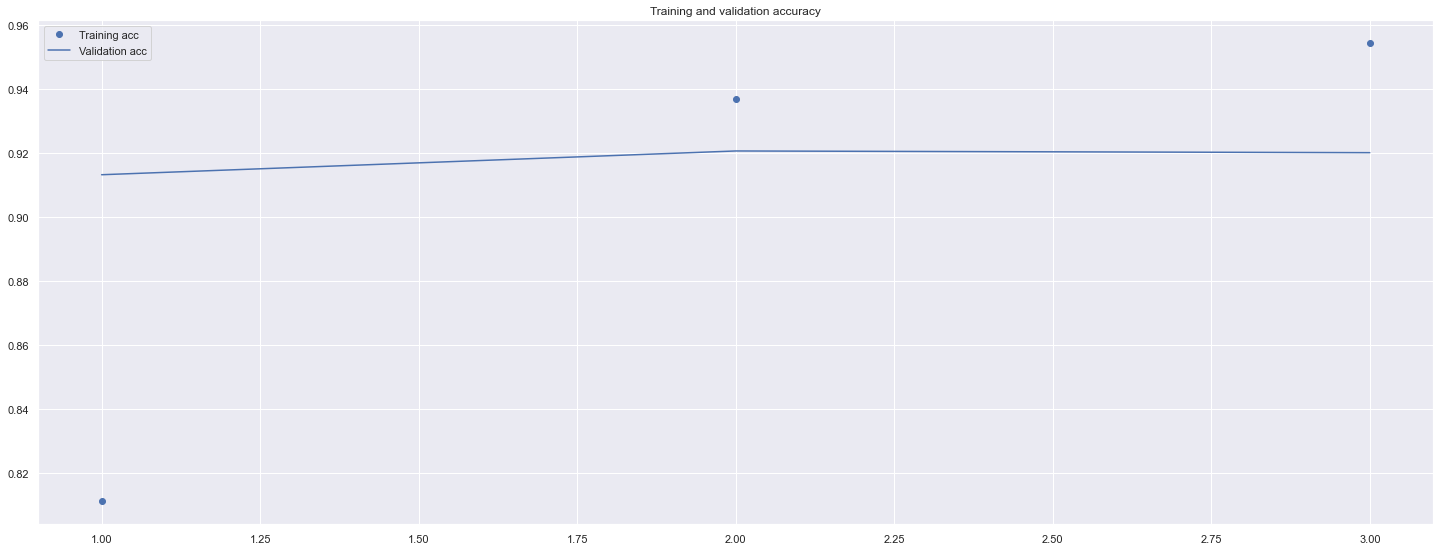

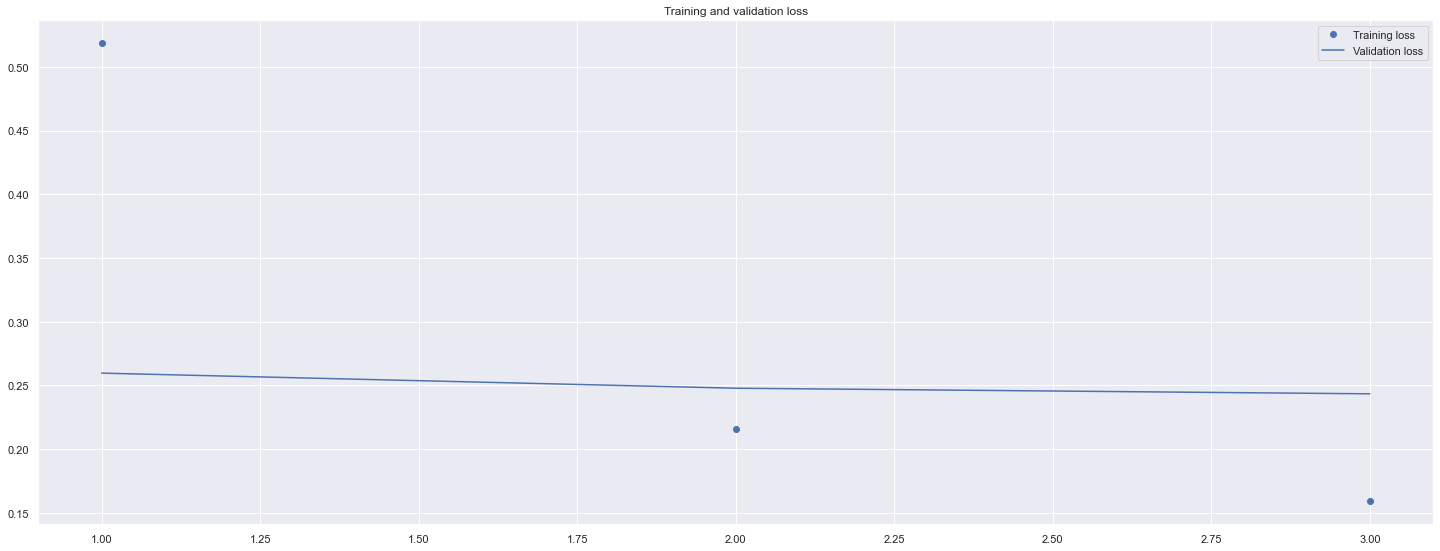

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Saving and Using The Model LSTM
## Long Short Term Memory with accuracy 91%

In [ ]:
text = ["المباراة كانت بين الهلال والاتحاد"]
seq = x_tokenizer.texts_to_sequences(text)
padded = sequence.pad_sequences(seq,padding='post',maxlen=max_text_length)
pred = model.predict(padded)
labels = ['Sport', 'Politic', 'Religion','Art','Economy']
print( labels[np.argmax(pred)])

Sport


In [ ]:
text = ["بيكاسو مبدع في لوحاته"]
seq = x_tokenizer.texts_to_sequences(text)
padded = sequence.pad_sequences(seq,padding='post',maxlen=max_text_length)
pred = model.predict(padded)
labels = ['Sport', 'Politic', 'Religion','Art','Economy']
print( labels[np.argmax(pred)])

Art


In [ ]:
text = ["في السياسة ليس هناك عدو دائم او صديق دائم هناك مصالح دائمة"]
seq = x_tokenizer.texts_to_sequences(text)
padded = sequence.pad_sequences(seq,padding='post',maxlen=max_text_length)
pred = model.predict(padded)
labels = ['Sport', 'Politic', 'Religion','Art','Economy']
print( labels[np.argmax(pred)])

Politic


In [ ]:
text = ["اللهم اني اعوذ بك من زوال نعمتك"]
seq = x_tokenizer.texts_to_sequences(text)
padded = sequence.pad_sequences(seq,padding='post',maxlen=max_text_length)
pred = model.predict(padded)
labels = ['Sport', 'Politic', 'Religion','Art','Economy']
print( labels[np.argmax(pred)])

Religion


In [ ]:
text = ["اقتصاد السعودية مع ازمة كورونا"]
seq = x_tokenizer.texts_to_sequences(text)
padded = sequence.pad_sequences(seq,padding='post',maxlen=max_text_length)
pred = model.predict(padded)
labels = ['Sport', 'Politic', 'Religion','Art','Economy']
print( labels[np.argmax(pred)])

Economy


In [ ]:
from keras.models import load_model
model.save('ltsm.h5') 

In [ ]:
from flask import Flask 
import pickle

In [ ]:
# @app.route('/')
# def home():
#     filename = 'lstm.h5'
#     loaded_model = model.load(open(filename, 'rb'))
#     data = {df['text']}
#     X1 = pd.DataFrame(data, columns = ['text'])
#     precio = loaded_model.predict(X1)
#     rta = 'catogrie is '+ str(precio)
#     return rta

In [ ]:
# app.run()